## Part A. Preliminaries

## 3. Acquiring dataset

In [1]:
import pandas as pd #data loader library
import matplotlib.pyplot as plt #graph visualization library
import numpy as np
#iris dataset을 얻고 class별로 분리해놓는다.
df = pd.read_csv('./iris/iris.data', names=['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])
se=df[df['class'] =='Iris-setosa']
ve=df[df['class']=='Iris-versicolor']
vi=df[df['class']=='Iris-virginica']

## Part B. Iris classification using text data

## 3.

In [2]:
#iris dataset을 섞는다.
import random

idx = list(range(0,150))
random.shuffle(idx)

### Sepal Length feature를 사용한 classifier

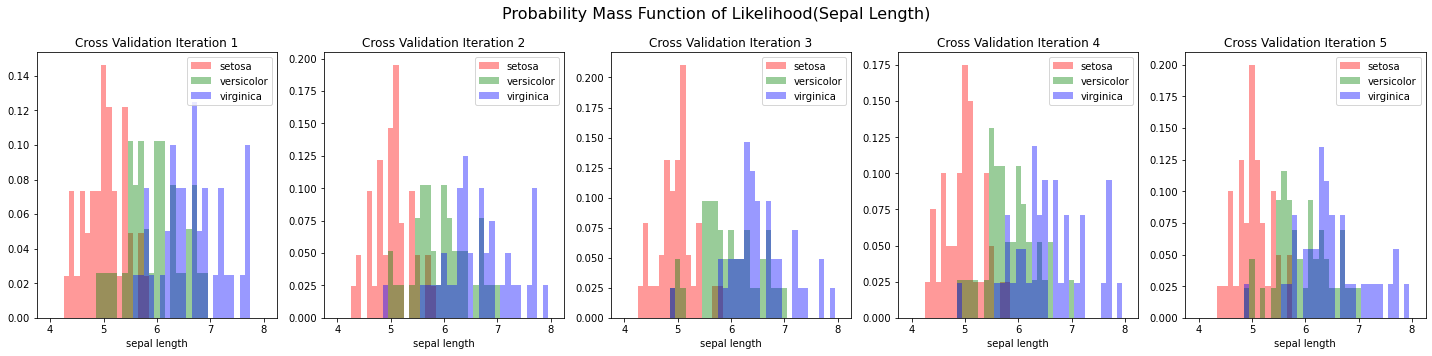

precision : 0.6676170126170127
recall : 0.6677154327154328


In [3]:
import numpy as np
precision = []
recall = []
fig, axes = plt.subplots(1,5,figsize=(20,5))
fig.suptitle("Probability Mass Function of Likelihood(Sepal Length)", fontsize=16)
#evaluation을 위해 5-fold cross validation을 한다.
for i in range(5):
    
    se_tp_n = 0 #setosa true positive
    ve_tp_n = 0 #versicolor true positive
    vi_tp_n = 0 #virginica true positive
    
    se_p_n = 0 #setosa positive
    ve_p_n = 0 #versicolor positive
    vi_p_n = 0 #virginica positive
    
    #1번째 fold부터 5번째 fold까지 5개의 fold가 있다.
    #(i+1)번째 fold는 evaluation에 사용하고 (i+1)번째 fold를 제외한 4개의 fold를 training에 사용한다.
    idx_eval = idx[i*30: (i+1)*30]
    idx_data = idx[:i*30]+idx[(i+1)*30:]

    data = df.loc[idx_data]
    eval_data = df.loc[idx_eval]
    eval_prediction = []

    se_data=data[data['class'] =='Iris-setosa']
    ve_data=data[data['class']=='Iris-versicolor']
    vi_data=data[data['class']=='Iris-virginica']
    se_size = len(se_data)
    ve_size = len(ve_data)
    vi_size = len(vi_data)
    
    #prior는 전체 120개 instance에 있는 각 class의 instance의 비율로 설정한다.
    se_prior = se_size/120
    ve_prior = ve_size/120
    vi_prior = vi_size/120
    
    #sepal length likelihood의 probability mass function을 구한다.
    #4.0부터 8.0까지 0.1의 간격으로 41개의 value에 대한 pmf를 구한다.
    #각 class에서 likelihood는 특정 value를 가지는 데이터를 세서 해당 class에 속하는 전체 데이터 개수로 나눠서 구한다.
    se_likelihood = np.zeros(41)
    ve_likelihood = np.zeros(41)
    vi_likelihood = np.zeros(41)

    sl = 3.9
    for j in range(41):
        sl += 0.1
        sl = round(sl,1)
        index = int(round((sl-4.0)/0.1,1))
        se_likelihood[index] = len(se_data[se_data['sepal length'] == sl])/se_size
        ve_likelihood[index] = len(ve_data[ve_data['sepal length'] == sl])/ve_size
        vi_likelihood[index] = len(vi_data[vi_data['sepal length'] == sl])/vi_size
    
    #sepal length likelihood의 probability mass function을 그린다.
    nums = np.arange(4,8.1,0.1)
    axes[i].bar(nums, se_likelihood, label = 'setosa', alpha=0.4, color='red', width=0.1)
    axes[i].bar(nums, ve_likelihood, label = 'versicolor',alpha=0.4, color='green', width=0.1)
    axes[i].bar(nums, vi_likelihood, label = 'virginica',alpha=0.4, color='blue', width=0.1)
    axes[i].set_xlabel("sepal length")
    axes[i].set_title("Cross Validation Iteration " + str(i+1))
    axes[i].legend()
    
    #posterior = likelihood * prior / evidence
    #위 식을 이용하여 sepal length posterior probability를 구한다.
    se_posterior = np.zeros(41)
    ve_posterior = np.zeros(41)
    vi_posterior = np.zeros(41)
    
    for j in range(41) :
        evidence = se_likelihood[j] * se_prior + ve_likelihood[j] * ve_prior + vi_likelihood[j] * vi_prior
        if evidence == 0 :
            se_posterior[j] = 0
            ve_posterior[j] = 0
            vi_posterior[j] = 0
            continue
            
        se_posterior[j] = se_likelihood[j] * se_prior / evidence
        ve_posterior[j] = ve_likelihood[j] * ve_prior / evidence
        vi_posterior[j] = vi_likelihood[j] * vi_prior / evidence
  
    #(i+1)번째 fold에 대해 evaluation한다.
    #posterior probability가 가장 높은 class를 해당 data의 class로 분류한다.
    for j in range(30):
        d = eval_data.iloc[j]
        sl = float(d['sepal length'])
        sl_idx = int(round((sl-4.0)/0.1,1))
        
        max_prob = max(max(se_posterior[sl_idx],ve_posterior[sl_idx]),vi_posterior[sl_idx])
        if max_prob == se_posterior[sl_idx] : 
            eval_prediction.append('Iris-setosa')
            se_p_n += 1
            if d['class'] == 'Iris-setosa' : se_tp_n += 1
        elif max_prob == ve_posterior[sl_idx] : 
            eval_prediction.append('Iris-versicolor')
            ve_p_n += 1
            if d['class'] == 'Iris-versicolor' : ve_tp_n += 1
        elif max_prob == vi_posterior[sl_idx] : 
            eval_prediction.append('Iris-virginica')
            vi_p_n += 1
            if d['class'] == 'Iris-virginica' : vi_tp_n += 1
    
    #각 class에 대한 precision과 recall을 구한다.
    #precision = tp/(tp+fp)
    #recall = tp/(tp+fn)
    if se_p_n == 0 :
        se_precision = 0
        se_recall = 0
    else : 
        se_precision = se_tp_n / se_p_n
        se_recall = se_tp_n / (50-se_size)
    
    if ve_p_n == 0 :
        ve_precision = 0
        ve_recall = 0
    else : 
        ve_precision = ve_tp_n / ve_p_n
        ve_recall = ve_tp_n / (50-ve_size)
        
    if vi_p_n == 0 :
        vi_precision = 0
        vi_recall = 0
    else : 
        vi_precision = vi_tp_n / vi_p_n
        vi_recall = vi_tp_n / (50-vi_size)
        
    #구한 3개의 precision의 평균과 3개의 recall의 평균을 구한다.
    precision.append((se_precision+ve_precision+vi_precision)/3)
    recall.append((se_recall+ve_recall+vi_recall)/3)

plt.tight_layout()
plt.show()

#5-fold cross validation을 통해 나온 5개의 evaluation 결과의 평균을 이 classifier의 최종 성능으로 한다.
mean_precision = sum(precision)/5
mean_recall = sum(recall)/5

print("precision : " + str(mean_precision))
print("recall : " + str(mean_recall))


### Sepal Width feature를 사용한 classifier

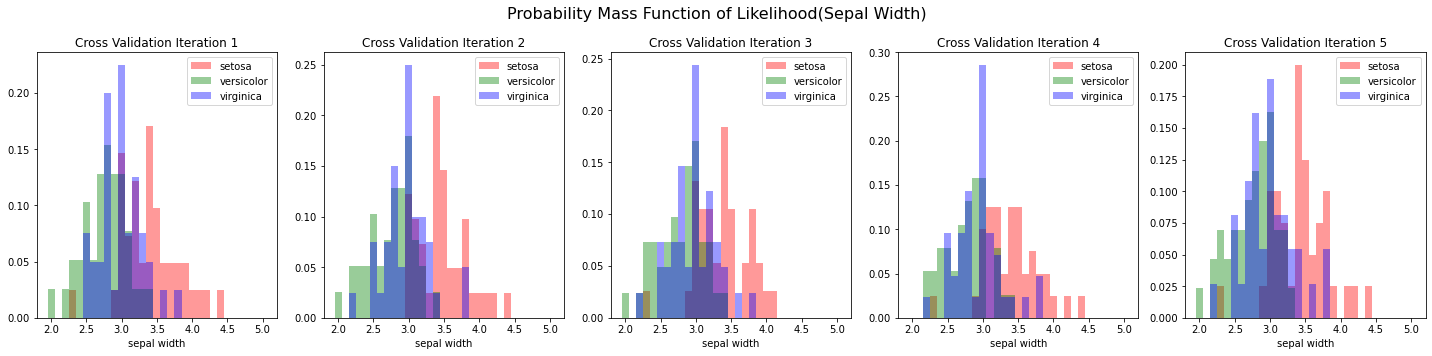

precision : 0.5318196182902065
recall : 0.488934398934399


In [4]:
import numpy as np
precision = []
recall = []
fig, axes = plt.subplots(1,5,figsize=(20,5))
fig.suptitle("Probability Mass Function of Likelihood(Sepal Width)", fontsize=16)
#evaluation을 위해 5-fold cross validation을 한다.
for i in range(5):
    
    se_tp_n = 0 #setosa true positive
    ve_tp_n = 0 #versicolor true positive
    vi_tp_n = 0 #virginica true positive
    
    se_p_n = 0 #setosa positive
    ve_p_n = 0 #versicolor positive
    vi_p_n = 0 #virginica positive
    
    #(i+1)번째 fold는 evaluation에 사용하고 (i+1)번째 fold를 제외한 4개의 fold를 training에 사용한다.
    idx_eval = idx[i*30: (i+1)*30]
    idx_data = idx[:i*30]+idx[(i+1)*30:]

    data = df.loc[idx_data]
    eval_data = df.loc[idx_eval]
    eval_prediction = []

    se_data=data[data['class'] =='Iris-setosa']
    ve_data=data[data['class']=='Iris-versicolor']
    vi_data=data[data['class']=='Iris-virginica']
    se_size = len(se_data)
    ve_size = len(ve_data)
    vi_size = len(vi_data)
    
    #prior
    se_prior = se_size/120
    ve_prior = ve_size/120
    vi_prior = vi_size/120
    
    #sepal width likelihood
    #2.0부터 5.0까지 0.1의 간격으로 31개의 value에 대한 pmf를 구한다.
    se_likelihood = np.zeros(31)
    ve_likelihood = np.zeros(31)
    vi_likelihood = np.zeros(31)

    sw = 1.9
    for j in range(31):
        sw += 0.1
        sw = round(sw,1)
        index = int(round((sw-2.0)/0.1,1))
        se_likelihood[index] = len(se_data[se_data['sepal width'] == sw])/se_size
        ve_likelihood[index] = len(ve_data[ve_data['sepal width'] == sw])/ve_size
        vi_likelihood[index] = len(vi_data[vi_data['sepal width'] == sw])/vi_size

    nums = np.arange(2,5.1,0.1)
    axes[i].bar(nums, se_likelihood, label = 'setosa', alpha=0.4, color='red', width=0.1)
    axes[i].bar(nums, ve_likelihood, label = 'versicolor',alpha=0.4, color='green', width=0.1)
    axes[i].bar(nums, vi_likelihood, label = 'virginica',alpha=0.4, color='blue', width=0.1)
    axes[i].set_xlabel("sepal width")
    axes[i].set_title("Cross Validation Iteration " + str(i+1))
    axes[i].legend()
    
    #sepal width posterior probability
    se_posterior = np.zeros(31)
    ve_posterior = np.zeros(31)
    vi_posterior = np.zeros(31)
    
    for j in range(31) :
        evidence = se_likelihood[j] * se_prior + ve_likelihood[j] * ve_prior + vi_likelihood[j] * vi_prior
        if evidence == 0 :
            se_posterior[j] = 0
            ve_posterior[j] = 0
            vi_posterior[j] = 0
            continue
            
        se_posterior[j] = se_likelihood[j] * se_prior / evidence
        ve_posterior[j] = ve_likelihood[j] * ve_prior / evidence
        vi_posterior[j] = vi_likelihood[j] * vi_prior / evidence
  
    #(i+1)번째 fold에 대해 evaluation한다.
    for j in range(30):
        d = eval_data.iloc[j]
        sl = float(d['sepal width'])
        sl_idx = int(round((sl-2.0)/0.1,1))
        
        max_prob = max(max(se_posterior[sl_idx],ve_posterior[sl_idx]),vi_posterior[sl_idx])
        if max_prob == se_posterior[sl_idx] : 
            eval_prediction.append('Iris-setosa')
            se_p_n += 1
            if d['class'] == 'Iris-setosa' : se_tp_n += 1
        elif max_prob == ve_posterior[sl_idx] : 
            eval_prediction.append('Iris-versicolor')
            ve_p_n += 1
            if d['class'] == 'Iris-versicolor' : ve_tp_n += 1
        elif max_prob == vi_posterior[sl_idx] : 
            eval_prediction.append('Iris-virginica')
            vi_p_n += 1
            if d['class'] == 'Iris-virginica' : vi_tp_n += 1
                
    if se_p_n == 0 :
        se_precision = 0
        se_recall = 0
    else : 
        se_precision = se_tp_n / se_p_n
        se_recall = se_tp_n / (50-se_size)
    
    if ve_p_n == 0 :
        ve_precision = 0
        ve_recall = 0
    else : 
        ve_precision = ve_tp_n / ve_p_n
        ve_recall = ve_tp_n / (50-ve_size)
        
    if vi_p_n == 0 :
        vi_precision = 0
        vi_recall = 0
    else : 
        vi_precision = vi_tp_n / vi_p_n
        vi_recall = vi_tp_n / (50-vi_size)

    precision.append((se_precision+ve_precision+vi_precision)/3)
    recall.append((se_recall+ve_recall+vi_recall)/3)

plt.tight_layout()
plt.show()
mean_precision = sum(precision)/5
mean_recall = sum(recall)/5

print("precision : " + str(mean_precision))
print("recall : " + str(mean_recall))


### Petal Length feature를 사용한 classifier

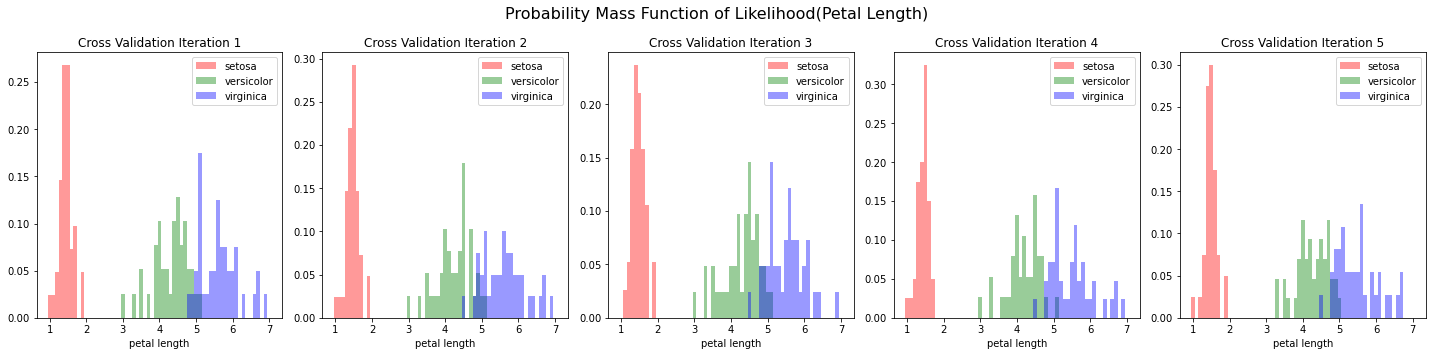

precision : 0.8474527324527324
recall : 0.8093164243164243


In [5]:
import numpy as np
precision = []
recall = []
fig, axes = plt.subplots(1,5,figsize=(20,5))
fig.suptitle("Probability Mass Function of Likelihood(Petal Length)", fontsize=16)
#evaluation을 위해 5-fold cross validation을 한다.
for i in range(5):
    
    se_tp_n = 0 #setosa true positive
    ve_tp_n = 0 #versicolor true positive
    vi_tp_n = 0 #virginica true positive
    
    se_p_n = 0 #setosa positive
    ve_p_n = 0 #versicolor positive
    vi_p_n = 0 #virginica positive
    
    #(i+1)번째 fold는 evaluation에 사용하고 (i+1)번째 fold를 제외한 4개의 fold를 training에 사용한다.
    idx_eval = idx[i*30: (i+1)*30]
    idx_data = idx[:i*30]+idx[(i+1)*30:]

    data = df.loc[idx_data]
    eval_data = df.loc[idx_eval]
    eval_class = eval_data['class']
    eval_prediction = []

    se_data=data[data['class'] =='Iris-setosa']
    ve_data=data[data['class']=='Iris-versicolor']
    vi_data=data[data['class']=='Iris-virginica']
    se_size = len(se_data)
    ve_size = len(ve_data)
    vi_size = len(vi_data)
    
    #prior
    se_prior = se_size/120
    ve_prior = ve_size/120
    vi_prior = vi_size/120
    
    #petal length likelihood
    #1.0부터 7.0까지 0.1의 간격으로 61개의 value에 대한 pmf를 구한다.
    se_likelihood = np.zeros(61)
    ve_likelihood = np.zeros(61)
    vi_likelihood = np.zeros(61)

    pl = 0.9
    for j in range(61):
        pl += 0.1
        pl = round(pl,1)
        index = int(round((pl-1.0)/0.1,1))
        se_likelihood[index] = len(se_data[se_data['petal length'] == pl])/se_size
        ve_likelihood[index] = len(ve_data[ve_data['petal length'] == pl])/ve_size
        vi_likelihood[index] = len(vi_data[vi_data['petal length'] == pl])/vi_size
    
    nums = np.arange(1,7.1,0.1)
    axes[i].bar(nums, se_likelihood, label = 'setosa', alpha=0.4, color='red', width=0.1)
    axes[i].bar(nums, ve_likelihood, label = 'versicolor',alpha=0.4, color='green', width=0.1)
    axes[i].bar(nums, vi_likelihood, label = 'virginica',alpha=0.4, color='blue', width=0.1)
    axes[i].set_xlabel("petal length")
    axes[i].set_title("Cross Validation Iteration " + str(i+1))
    axes[i].legend()
    
    #petal length posterior probability
    se_posterior = np.zeros(61)
    ve_posterior = np.zeros(61)
    vi_posterior = np.zeros(61)
    
    for j in range(61) :
        evidence = se_likelihood[j] * se_prior + ve_likelihood[j] * ve_prior + vi_likelihood[j] * vi_prior
        if evidence == 0 :
            se_posterior[j] = 0
            ve_posterior[j] = 0
            vi_posterior[j] = 0
            continue
            
        se_posterior[j] = se_likelihood[j] * se_prior / evidence
        ve_posterior[j] = ve_likelihood[j] * ve_prior / evidence
        vi_posterior[j] = vi_likelihood[j] * vi_prior / evidence
  
    #(i+1)번째 fold에 대해 evaluation한다.
    for j in range(30):
        d = eval_data.iloc[j]
        sl = float(d['petal length'])
        sl_idx = int(round((sl-1.0)/0.1,1))
        
        max_prob = max(max(se_posterior[sl_idx],ve_posterior[sl_idx]),vi_posterior[sl_idx])
        if max_prob == se_posterior[sl_idx] : 
            eval_prediction.append('Iris-setosa')
            se_p_n += 1
            if d['class'] == 'Iris-setosa' : se_tp_n += 1
        elif max_prob == ve_posterior[sl_idx] : 
            eval_prediction.append('Iris-versicolor')
            ve_p_n += 1
            if d['class'] == 'Iris-versicolor' : ve_tp_n += 1
        elif max_prob == vi_posterior[sl_idx] : 
            eval_prediction.append('Iris-virginica')
            vi_p_n += 1
            if d['class'] == 'Iris-virginica' : vi_tp_n += 1
                
    if se_p_n == 0 :
        se_precision = 0
        se_recall = 0
    else : 
        se_precision = se_tp_n / se_p_n
        se_recall = se_tp_n / (50-se_size)
    
    if ve_p_n == 0 :
        ve_precision = 0
        ve_recall = 0
    else : 
        ve_precision = ve_tp_n / ve_p_n
        ve_recall = ve_tp_n / (50-ve_size)
        
    if vi_p_n == 0 :
        vi_precision = 0
        vi_recall = 0
    else : 
        vi_precision = vi_tp_n / vi_p_n
        vi_recall = vi_tp_n / (50-vi_size)

    precision.append((se_precision+ve_precision+vi_precision)/3)
    recall.append((se_recall+ve_recall+vi_recall)/3)

plt.tight_layout()
plt.show()
mean_precision = sum(precision)/5
mean_recall = sum(recall)/5

print("precision : " + str(mean_precision))
print("recall : " + str(mean_recall))


### Petal Width feature를 사용한 classifier

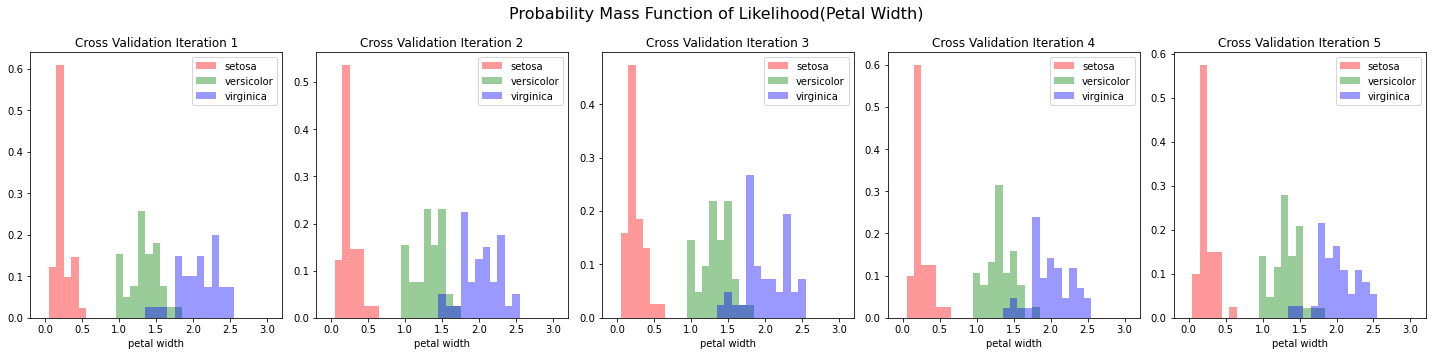

precision : 0.9547940947940947
recall : 0.9581274281274281


In [6]:
import numpy as np
precision = []
recall = []
fig, axes = plt.subplots(1,5,figsize=(20,5))
fig.suptitle("Probability Mass Function of Likelihood(Petal Width)", fontsize=16)
#evaluation을 위해 5-fold cross validation을 한다.
for i in range(5):
    
    se_tp_n = 0 #setosa true positive
    ve_tp_n = 0 #versicolor true positive
    vi_tp_n = 0 #virginica true positive
    
    se_p_n = 0 #setosa positive
    ve_p_n = 0 #versicolor positive
    vi_p_n = 0 #virginica positive
    
    #(i+1)번째 fold는 evaluation에 사용하고 (i+1)번째 fold를 제외한 4개의 fold를 training에 사용한다.
    idx_eval = idx[i*30: (i+1)*30]
    idx_data = idx[:i*30]+idx[(i+1)*30:]

    data = df.loc[idx_data]
    eval_data = df.loc[idx_eval]
    eval_prediction = []

    se_data=data[data['class'] =='Iris-setosa']
    ve_data=data[data['class']=='Iris-versicolor']
    vi_data=data[data['class']=='Iris-virginica']
    se_size = len(se_data)
    ve_size = len(ve_data)
    vi_size = len(vi_data)
    
    #prior
    se_prior = se_size/120
    ve_prior = ve_size/120
    vi_prior = vi_size/120
    
    #petal width likelihood
    #0.0부터 3.0까지 0.1의 간격으로 31개의 value에 대한 pmf를 구한다.
    se_likelihood = np.zeros(31)
    ve_likelihood = np.zeros(31)
    vi_likelihood = np.zeros(31)

    pw = -0.1
    for j in range(31):
        pw += 0.1
        pw = round(pw,1)
        index = int(round((pw-0.0)/0.1,1))
        se_likelihood[index] = len(se_data[se_data['petal width'] == pw])/se_size
        ve_likelihood[index] = len(ve_data[ve_data['petal width'] == pw])/ve_size
        vi_likelihood[index] = len(vi_data[vi_data['petal width'] == pw])/vi_size
    
    nums = np.arange(0,3.1,0.1)
    axes[i].bar(nums, se_likelihood, label = 'setosa', alpha=0.4, color='red', width=0.1)
    axes[i].bar(nums, ve_likelihood, label = 'versicolor',alpha=0.4, color='green', width=0.1)
    axes[i].bar(nums, vi_likelihood, label = 'virginica',alpha=0.4, color='blue', width=0.1)
    axes[i].set_xlabel("petal width")
    axes[i].set_title("Cross Validation Iteration " + str(i+1))
    axes[i].legend()
    
    #petal width posterior probability
    se_posterior = np.zeros(31)
    ve_posterior = np.zeros(31)
    vi_posterior = np.zeros(31)
    
    for j in range(31) :
        evidence = se_likelihood[j] * se_prior + ve_likelihood[j] * ve_prior + vi_likelihood[j] * vi_prior
        if evidence == 0 :
            se_posterior[j] = 0
            ve_posterior[j] = 0
            vi_posterior[j] = 0
            continue
            
        se_posterior[j] = se_likelihood[j] * se_prior / evidence
        ve_posterior[j] = ve_likelihood[j] * ve_prior / evidence
        vi_posterior[j] = vi_likelihood[j] * vi_prior / evidence
  
    #(i+1)번째 fold에 대해 evaluation한다.
    for j in range(30):
        d = eval_data.iloc[j]
        sl = float(d['petal width'])
        sl_idx = int(round((sl-0.0)/0.1,1))
        
        max_prob = max(max(se_posterior[sl_idx],ve_posterior[sl_idx]),vi_posterior[sl_idx])
        if max_prob == se_posterior[sl_idx] : 
            eval_prediction.append('Iris-setosa')
            se_p_n += 1
            if d['class'] == 'Iris-setosa' : se_tp_n += 1
        elif max_prob == ve_posterior[sl_idx] : 
            eval_prediction.append('Iris-versicolor')
            ve_p_n += 1
            if d['class'] == 'Iris-versicolor' : ve_tp_n += 1
        elif max_prob == vi_posterior[sl_idx] : 
            eval_prediction.append('Iris-virginica')
            vi_p_n += 1
            if d['class'] == 'Iris-virginica' : vi_tp_n += 1
                
    if se_p_n == 0 :
        se_precision = 0
        se_recall = 0
    else : 
        se_precision = se_tp_n / se_p_n
        se_recall = se_tp_n / (50-se_size)
    
    if ve_p_n == 0 :
        ve_precision = 0
        ve_recall = 0
    else : 
        ve_precision = ve_tp_n / ve_p_n
        ve_recall = ve_tp_n / (50-ve_size)
        
    if vi_p_n == 0 :
        vi_precision = 0
        vi_recall = 0
    else : 
        vi_precision = vi_tp_n / vi_p_n
        vi_recall = vi_tp_n / (50-vi_size)

    precision.append((se_precision+ve_precision+vi_precision)/3)
    recall.append((se_recall+ve_recall+vi_recall)/3)

plt.tight_layout()
plt.show()
mean_precision = sum(precision)/5
mean_recall = sum(recall)/5

print("precision : " + str(mean_precision))
print("recall : " + str(mean_recall))


### 4개의 feature를 모두 사용한 classifier
- Sepal length, Sepal width, Petal length, Petal width feature들은 서로 independent하다고 가정한다.

In [7]:
#evaluation을 위해 5-fold cross validation을 한다.
precision = []
recall = []
for i in range(5):   
    se_tp_n = 0
    ve_tp_n = 0
    vi_tp_n = 0
    se_p_n = 0
    ve_p_n = 0
    vi_p_n = 0
    
    #(i+1)번째 fold는 evaluation에 사용하고 (i+1)번째 fold를 제외한 4개의 fold를 training에 사용한다.
    idx_eval = idx[i*30: (i+1)*30]
    idx_data = idx[:i*30]+idx[(i+1)*30:]

    data = df.loc[idx_data]
    eval_data = df.loc[idx_eval]
    eval_prediction = []

    se_data=data[data['class'] =='Iris-setosa']
    ve_data=data[data['class']=='Iris-versicolor']
    vi_data=data[data['class']=='Iris-virginica']
    se_size = len(se_data)
    ve_size = len(ve_data)
    vi_size = len(vi_data)
    
    #prior
    se_prior = se_size/120
    ve_prior = ve_size/120
    vi_prior = vi_size/120
    
    #sepal length likelihood
    #4.0부터 8.0까지 0.1의 간격으로 41개의 value에 대한 pmf를 구한다.
    se_l_sl = np.zeros(41)
    ve_l_sl = np.zeros(41)
    vi_l_sl = np.zeros(41)

    sl = 3.9
    for j in range(41):
        sl += 0.1
        sl = round(sl,1)
        index = int(round((sl-4.0)/0.1,1))
        se_l_sl[index] = len(se_data[se_data['sepal length'] == sl])/se_size
        ve_l_sl[index] = len(ve_data[ve_data['sepal length'] == sl])/ve_size
        vi_l_sl[index] = len(vi_data[vi_data['sepal length'] == sl])/vi_size
        
    #sepal width likelihood
    #2.0부터 5.0까지 0.1의 간격으로 31개의 value에 대한 pmf를 구한다.
    se_l_sw = np.zeros(31)
    ve_l_sw = np.zeros(31)
    vi_l_sw = np.zeros(31)

    sw = 1.9
    for j in range(31):
        sw += 0.1
        sw = round(sw,1)
        index = int(round((sw-2.0)/0.1,1))
        se_l_sw[index] = len(se_data[se_data['sepal width'] == sw])/se_size
        ve_l_sw[index] = len(ve_data[ve_data['sepal width'] == sw])/ve_size
        vi_l_sw[index] = len(vi_data[vi_data['sepal width'] == sw])/vi_size
    
    #petal length likelihood
    #1.0부터 7.0까지 0.1의 간격으로 61개의 value에 대한 pmf를 구한다.
    se_l_pl = np.zeros(61)
    ve_l_pl = np.zeros(61)
    vi_l_pl = np.zeros(61)

    pl = 0.9
    for j in range(61):
        pl += 0.1
        pl = round(pl,1)
        index = int(round((pl-1.0)/0.1,1))
        se_l_pl[index] = len(se_data[se_data['petal length'] == pl])/se_size
        ve_l_pl[index] = len(ve_data[ve_data['petal length'] == pl])/ve_size
        vi_l_pl[index] = len(vi_data[vi_data['petal length'] == pl])/vi_size
        
    #petal width likelihood
    #0.0부터 3.0까지 0.1의 간격으로 31개의 value에 대한 pmf를 구한다.
    se_l_pw = np.zeros(31)
    ve_l_pw = np.zeros(31)
    vi_l_pw = np.zeros(31)

    pw = -0.1
    for j in range(31):
        pw += 0.1
        pw = round(pw,1)
        index = int(round((pw-0.0)/0.1,1))
        se_l_pw[index] = len(se_data[se_data['petal width'] == pw])/se_size
        ve_l_pw[index] = len(ve_data[ve_data['petal width'] == pw])/ve_size
        vi_l_pw[index] = len(vi_data[vi_data['petal width'] == pw])/vi_size
        
    for j in range(30):
        d = eval_data.iloc[j]
        sl = float(d['sepal length'])
        sw = float(d['sepal width'])
        pl = float(d['petal length'])
        pw = float(d['petal width'])
        sl_idx = int(round((sl-4.0)/0.1,1))
        sw_idx = int(round((sw-2.0)/0.1,1))
        pl_idx = int(round((pl-1.0)/0.1,1))
        pw_idx = int(round((pw-0.0)/0.1,1))
        
        #evidence는 normalize 역할만 하고 대소 비교에는 영향을 주지 않으므로 생략한다.
        se_prob = se_l_sl[sl_idx]*se_l_sw[sw_idx]*se_l_pl[pl_idx]*se_l_pw[pw_idx]*se_prior
        ve_prob = ve_l_sl[sl_idx]*ve_l_sw[sw_idx]*ve_l_pl[pl_idx]*ve_l_pw[pw_idx]*ve_prior
        vi_prob = vi_l_sl[sl_idx]*vi_l_sw[sw_idx]*vi_l_pl[pl_idx]*vi_l_pw[pw_idx]*vi_prior
        
        max_prob = max(max(se_prob,ve_prob),vi_prob)
        if max_prob == se_prob : 
            eval_prediction.append('Iris-setosa')
            se_p_n += 1
            if d['class'] == 'Iris-setosa' : se_tp_n += 1
        elif max_prob == ve_prob : 
            eval_prediction.append('Iris-versicolor')
            ve_p_n += 1
            if d['class'] == 'Iris-versicolor' : ve_tp_n += 1
        elif max_prob == vi_prob : 
            eval_prediction.append('Iris-virginica')
            vi_p_n += 1
            if d['class'] == 'Iris-virginica' : vi_tp_n += 1
                
    se_precision = se_tp_n / se_p_n
    ve_precision = ve_tp_n / ve_p_n
    vi_precision = vi_tp_n / vi_p_n
    precision.append((se_precision+ve_precision+vi_precision)/3)
    
    se_recall = se_tp_n / (50-se_size)
    ve_recall = ve_tp_n / (50-ve_size)
    vi_recall = vi_tp_n / (50-vi_size)
    recall.append((se_recall+ve_recall+vi_recall)/3)

mean_precision = sum(precision)/5
mean_recall = sum(recall)/5

print("precision : " + str(mean_precision))
print("recall : " + str(mean_recall))


precision : 0.8046247563352826
recall : 0.7092266992266991
